In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc('font', size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='white')
sns.set(style='whitegrid', color_codes=True)

# Data Exploration

In [9]:
data = pd.read_csv('enterprise.csv')
data.head()

,valuationdate,revenues,ebit,depreciation,capex,ncwc,bv,y
0,30/06/2011,86470.7000,10387.500000,6429.000,3512.000,16848.90000,47945.100,91760.80000
1,31/12/2010,84754.2000,14031.180800,8658.600,17172.500,12095.10000,66804.400,184461.70000
2,30/09/2016,15653.4800,221.347452,647.239,749.478,1468.42800,10128.726,23323.68520
3,30/09/2018,62001.3297,7551.761957,1808.830,2702.850,11873.25464,27144.930,130202.79240
4,30/09/2014,1242.8300,497.141501,232.027,1552.908,149.97100,1463.052,11472.12267


In [10]:
data = data.dropna()
print(data.shape)
print(list(data.columns))

(1061, 8)
['valuationdate', 'revenues', 'ebit', 'depreciation', 'capex', 'ncwc', 'bv', 'y']


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1061 entries, 0 to 1060
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   valuationdate  1061 non-null   object 
 1   revenues       1061 non-null   float64
 2   ebit           1061 non-null   float64
 3   depreciation   1061 non-null   float64
 4   capex          1061 non-null   float64
 5   ncwc           1061 non-null   float64
 6   bv             1061 non-null   float64
 7   y              1061 non-null   float64
dtypes: float64(7), object(1)
memory usage: 74.6+ KB


In [14]:
data.describe()

,revenues,ebit,depreciation,capex,ncwc,bv,y
count,1.061000e+03,1061.000000,1061.000000,1061.000000,1061.000000,1.061000e+03,1.061000e+03
mean,1.632727e+05,24076.406810,8002.050367,10961.602205,22324.130946,8.057162e+04,3.292238e+05
std,2.213828e+05,31871.076559,13898.135849,20250.735197,54636.421540,1.043500e+05,4.056701e+05
min,8.560000e+01,-29982.979880,-5.690000,-694.661000,-118819.899000,-1.503965e+04,3.692000e+02
25%,4.265958e+04,4522.900000,999.340000,1666.600000,3115.247000,1.689500e+04,6.981010e+04
50%,1.082011e+05,12224.611950,3446.250000,4949.447000,10736.200000,4.172290e+04,1.850416e+05
75%,1.862485e+05,32228.941870,8361.220000,11201.479000,23454.185000,1.147563e+05,4.258273e+05
max,2.586712e+06,289541.300000,128993.500000,205525.700000,623588.700000,1.009026e+06,4.175892e+06


In [15]:
data.corr()

,revenues,ebit,depreciation,capex,ncwc,bv,y
revenues,1.000000,0.682297,0.563150,0.609471,0.275313,0.693262,0.530673
ebit,0.682297,1.000000,0.743015,0.766196,0.335241,0.842905,0.716322
depreciation,0.563150,0.743015,1.000000,0.848817,0.218191,0.766616,0.563432
capex,0.609471,0.766196,0.848817,1.000000,0.164111,0.731001,0.486895
ncwc,0.275313,0.335241,0.218191,0.164111,1.000000,0.389992,0.331766
bv,0.693262,0.842905,0.766616,0.731001,0.389992,1.000000,0.762673
y,0.530673,0.716322,0.563432,0.486895,0.331766,0.762673,1.000000


<AxesSubplot:>

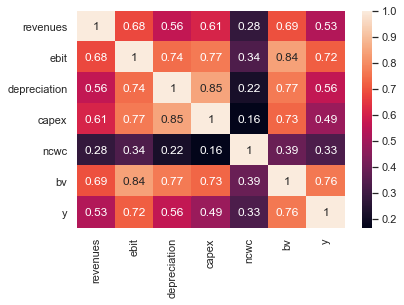

In [16]:
sns.heatmap(data.corr(),annot=True)

In [17]:
corr_matrix = data.corr()
corr_matrix['y'].sort_values(ascending=False)

y               1.000000
bv              0.762673
ebit            0.716322
depreciation    0.563432
revenues        0.530673
capex           0.486895
ncwc            0.331766
Name: y, dtype: float64

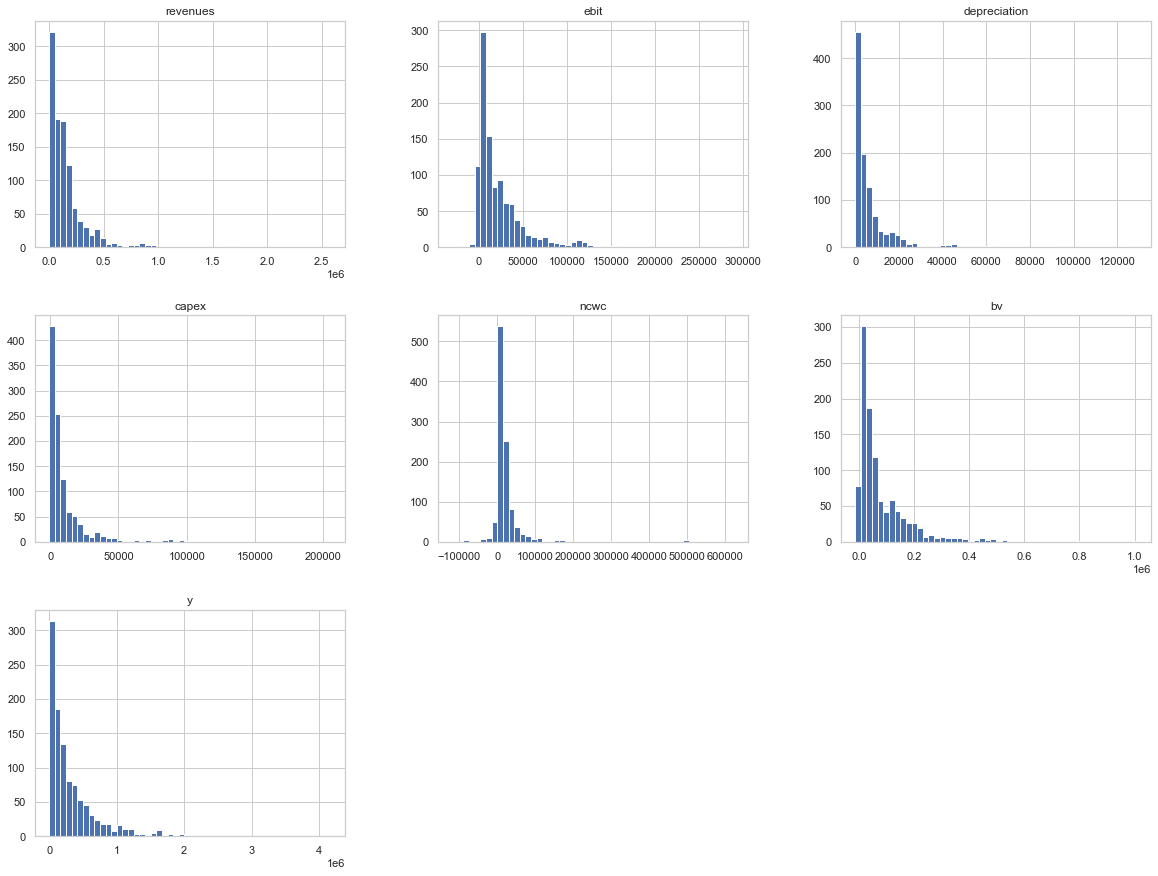

In [19]:
%matplotlib inline
data.hist(bins=50, figsize=(20,15))
plt.show()

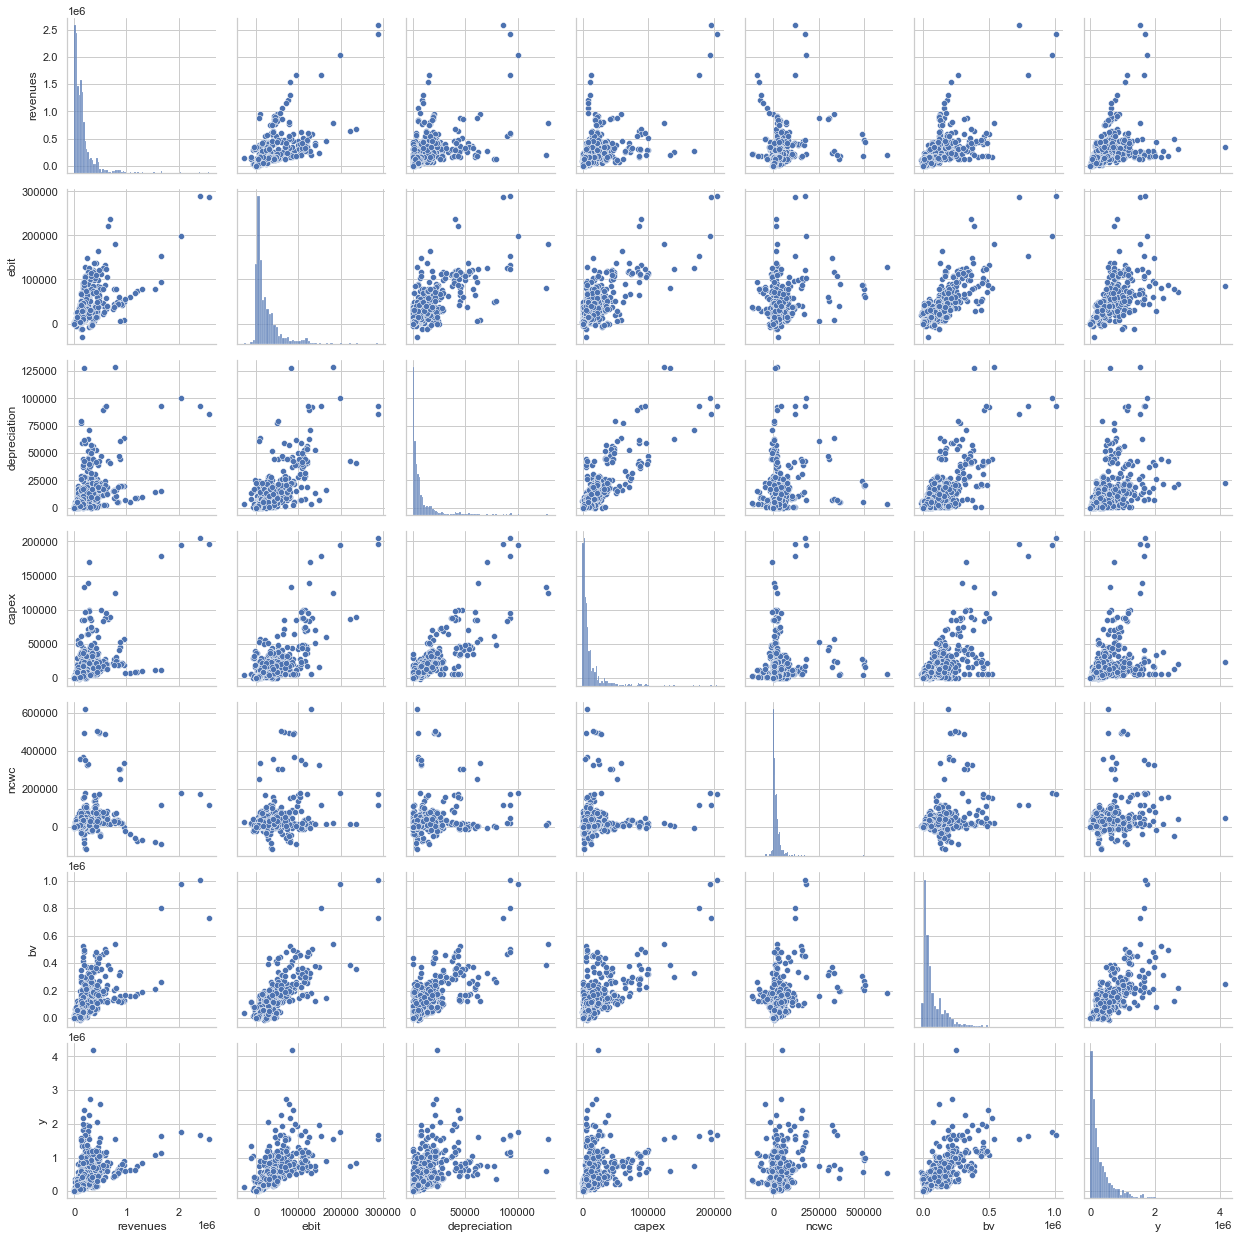

In [20]:
sns.pairplot(data)

Text(0, 0.5, 'Frequency')

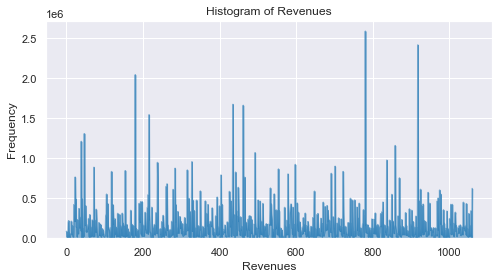

In [40]:
sns.set(style='dark')
sns.set(style='darkgrid', color_codes=True)
plt.rcParams["figure.figsize"] = (8,4)

data.revenues.plot.area(color='tab:blue',stacked=None)
plt.title('Histogram of Revenues')
plt.xlabel('Revenues')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

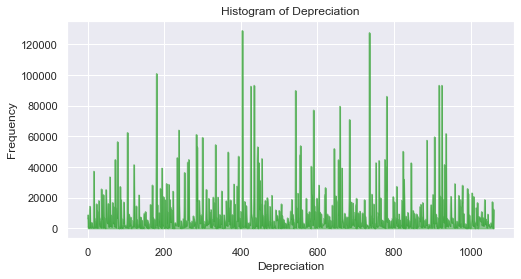

In [41]:
data.depreciation.plot.area(color='tab:green',stacked=None)
plt.title('Histogram of Depreciation')
plt.xlabel('Depreciation')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

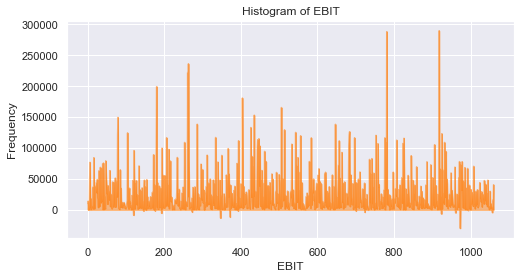

In [42]:
data.ebit.plot.area(color='tab:orange',stacked=None)
plt.title('Histogram of EBIT')
plt.xlabel('EBIT')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

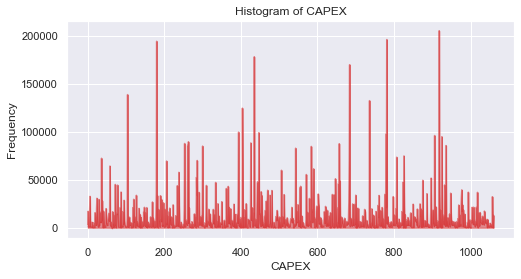

In [43]:
data.capex.plot.area(color='tab:red',stacked=None)
plt.title('Histogram of CAPEX')
plt.xlabel('CAPEX')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

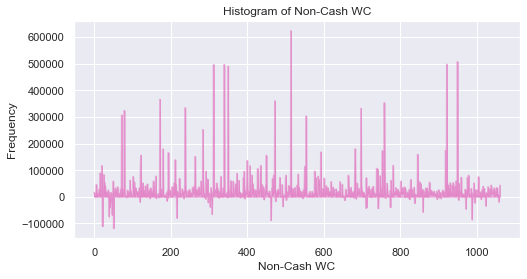

In [45]:
data.ncwc.plot.area(color='tab:pink',stacked=None)
plt.title('Histogram of Non-Cash WC')
plt.xlabel('Non-Cash WC')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

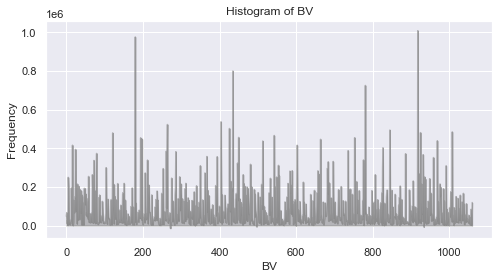

In [46]:
data.bv.plot.area(color='tab:gray',stacked=None)
plt.title('Histogram of BV')
plt.xlabel('BV')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

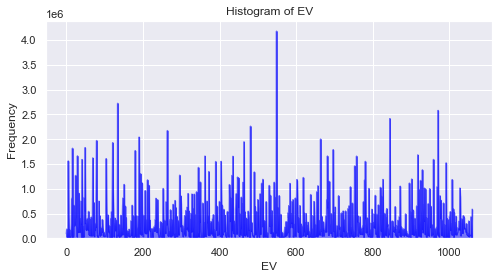

In [48]:
data.y.plot.area(color='blue',stacked=None)
plt.title('Histogram of EV')
plt.xlabel('EV')
plt.ylabel('Frequency')

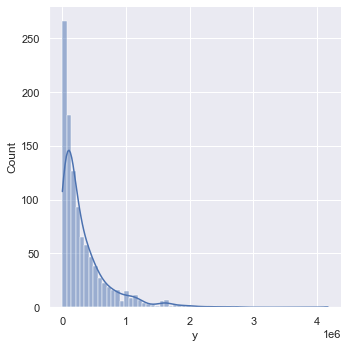

In [53]:
sns.displot(data['y'], kde=True)

# Data Preprocessing

In [55]:
data.dtypes

valuationdate     object
revenues         float64
ebit             float64
depreciation     float64
capex            float64
ncwc             float64
bv               float64
y                float64
dtype: object

In [57]:
data_final = data.drop(['valuationdate'],axis=1)

In [61]:
data_final.columns

Index(['revenues', 'ebit', 'depreciation', 'capex', 'ncwc', 'bv', 'y'], dtype='object')

In [64]:
X = data_final.loc[:, data_final.columns != 'y']
Y = data_final.loc[:, data_final.columns == 'y']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state=42)

print('Length of the total data is:', len(X))
print('Length of the training data is:', len(X_train))
print('Length of the testing data is:', len(X_test))

Length of the total data is: 1061
Length of the training data is: 710
Length of the testing data is: 351


In [65]:
data_final_vars = data_final.columns.values.tolist()
y1=['y']
X1=[i for i in data_final_vars if i not in y1]

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lin = LinearRegression()
rfe = RFE(lin, 6)
rfe = rfe.fit(X_train, y_train.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True]
[1 1 1 1 1 1]


C:\Users\DEJK\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=6 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [66]:
cols=['revenues','ebit','depreciation','capex','ncwc','bv']
X=X_train[cols]
y=y_train['y']

print('Length of the train data is:', len(X))

Length of the train data is: 710


In [67]:
import statsmodels.api as st
X1 = st.add_constant(X)
lin_model = st.OLS(y,X1)
result = lin_model.fit()
print(result.summary2())

                    Results: Ordinary least squares
Model:                OLS               Adj. R-squared:      0.672     
Dependent Variable:   y                 AIC:                 19495.0240
Date:                 2021-10-13 11:12  BIC:                 19526.9808
No. Observations:     710               Log-Likelihood:      -9740.5   
Df Model:             6                 F-statistic:         243.4     
Df Residuals:         703               Prob (F-statistic):  7.10e-168 
R-squared:            0.675             Scale:               4.8756e+10
-----------------------------------------------------------------------
               Coef.     Std.Err.     t    P>|t|    [0.025     0.975]  
-----------------------------------------------------------------------
const        65125.3129 10930.8135  5.9580 0.0000 43664.3636 86586.2623
revenues         0.0833     0.0556  1.4979 0.1346    -0.0259     0.1926
ebit             5.4269     0.5354 10.1361 0.0000     4.3758     6.4781
depreciation

In [68]:
cols=['ebit','depreciation','capex','bv']
X=X_train[cols]
y=y_train['y']

print('Length of the train data is:', len(X))

Length of the train data is: 710


In [69]:
X1 = st.add_constant(X)
lin_model=st.OLS(y,X1)
result=lin_model.fit()
print(result.summary2())

                    Results: Ordinary least squares
Model:                OLS               Adj. R-squared:      0.671     
Dependent Variable:   y                 AIC:                 19496.0843
Date:                 2021-10-13 11:13  BIC:                 19518.9106
No. Observations:     710               Log-Likelihood:      -9743.0   
Df Model:             4                 F-statistic:         362.3     
Df Residuals:         705               Prob (F-statistic):  2.38e-169 
R-squared:            0.673             Scale:               4.8965e+10
-----------------------------------------------------------------------
               Coef.     Std.Err.     t    P>|t|    [0.025     0.975]  
-----------------------------------------------------------------------
const        69850.4566 10731.3576  6.5090 0.0000 48781.2111 90919.7021
ebit             5.6016     0.5271 10.6279 0.0000     4.5668     6.6364
depreciation     3.3747     1.1967  2.8199 0.0049     1.0251     5.7243
capex       

In [71]:
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [72]:
print("length of the total data is ",len(X))
print("length of the train data is ",len(X_train))
print("length of the test data is is ",len(X_test))

length of the total data is  710
length of the train data is  475
length of the test data is is  235


In [73]:
lin = LinearRegression()
lin.fit(X_train, y_train)

LinearRegression()

In [76]:
y_pred = lin.predict(X_test)
print('Linear Regression R-squared of the test set is: {:.2f}'.format(metrics.r2_score(y_test, y_pred)))

Linear Regression R-squared of the test set is: 0.61


In [77]:
print('Linear Regression Mean Squared Error of the test set is {:.2f}'.format(metrics.mean_squared_error(y_test, y_pred)))

Linear Regression Mean Squared Error of the test set is 54901555988.12


In [79]:
print('Linear Regression Root Mean Squared Error of the test set is {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Linear Regression Root Mean Squared Error of the test set is 234310.81


In [80]:
print('Linear Regression Mean Absolute Error of the test set is {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred)))

Linear Regression Mean Absolute Error of the test set is 130757.81


In [81]:
d = {'true':y_test, 'predicted':y_pred}
df =pd.DataFrame(d)

In [84]:
df['diff'] = df['predicted'] - df['true']
df.head()

,true,predicted,diff
537,5.550344e+05,525180.051892,-29854.318508
57,1.635538e+05,189687.925095,26134.174395
130,3.651706e+05,459606.343358,94435.750358
469,4.088116e+05,493587.710212,84776.110212
896,1.112490e+06,814061.685355,-298428.424645


In [85]:
print("length of the test data is is ",len(X_test))
print("number of the overestimations for the enterprise value is ",len(df['diff'][df['diff']>0]))
print("number of the underestimations for the enterprise value is ",len(df['diff'][df['diff']<0]))
print("number of the exact estimations for the enterprise value is ",len(df['diff'][df['diff']==0]))

length of the test data is is  235
number of the overestimations for the enterprise value is  151
number of the underestimations for the enterprise value is  84
number of the exact estimations for the enterprise value is  0


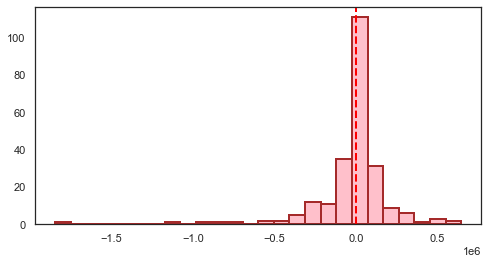

In [86]:
sns.set(style="white")
plt.hist(df['diff'], bins=26, color="pink", edgecolor='brown', linewidth=2)
plt.axvline(0, color="red", linestyle='dashed', linewidth=2)
plt.show()